# Final Project Probability Pacmann
## Khalid Rizki Ananta 
### Username: khalid-PN47

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Cek null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Analisis Descriptive Statistic

In [4]:
def plot_distribusi_data(data, varNumerik, title, varKategori=None, height_ratio=(.15, .85)):
    fig, (ax_box, ax_hist) = plt.subplots(2,1,sharex=True, figsize=(8,6),gridspec_kw={"height_ratios":height_ratio})
    fig.subplots_adjust(hspace=0)

    sns.boxplot(data=data, x=varNumerik, y = varKategori, ax=ax_box)  #color='#ADD8E6'
    sns.histplot(data=data, x=varNumerik, hue=varKategori, kde=True, ax=ax_hist)
    
    ax_hist.set_ylabel('Frequency')
    fig.suptitle(title)
    plt.show()

In [5]:
def get_mean(data, varNumerik, varKategori=None):
    if varKategori is not None:
        list_index = data[varKategori].unique()
        list_mean = []
        for value in data[varKategori].unique():
            list_mean.append(data[data[varKategori]==value][varNumerik].mean())
        series_mean_berdasarkan_kategori = pd.Series(list_mean, list_index)
        return np.round(series_mean_berdasarkan_kategori, 2)
    
    return np.round(data[varNumerik].mean(),2)

### Rata-Rata Umur Pengguna

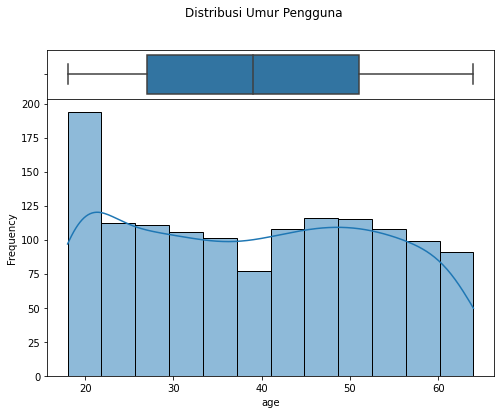

Rata-rata umur pengguna asuransi: 39.21 tahun


In [6]:
data = df
varNumerik = 'age'

plot_distribusi_data(data, varNumerik, title="Distribusi Umur Pengguna")

mean_age = get_mean(data, varNumerik)
print(f"Rata-rata umur pengguna asuransi: {mean_age} tahun")

### Rata-Rata BMI Pengguna yang Merokok

In [7]:
df_smokers = df[df['smoker']=='yes']

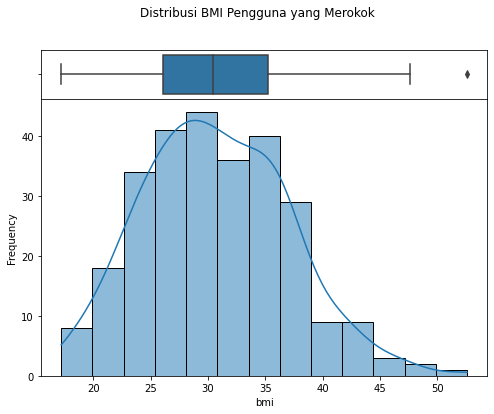

Rata-rata BMI pengguna yang merokok: 30.71 tahun


In [8]:
data = df_smokers
varNumerik = 'bmi'

plot_distribusi_data(data, varNumerik, title="Distribusi BMI Pengguna yang Merokok")

mean_bmi_perokok = get_mean(data, varNumerik)
print(f"Rata-rata BMI pengguna yang merokok: {mean_bmi_perokok} tahun")

### Variansi Charges antara Perokok dan Non-Perokok

In [9]:
variansi_charges_smoker = df_smokers['charges'].var()
variansi_charges_nonsmoker = df[df['smoker']=='no']['charges'].var()
print(f"variansi charges (premi) dari perokok    : {np.round(variansi_charges_smoker, 2)}")
print(f"variansi charges (premi) dari non-perokok:  {np.round(variansi_charges_nonsmoker,2)}")

variansi charges (premi) dari perokok    : 133207311.21
variansi charges (premi) dari non-perokok:  35925420.5


### Rata-Rata Umur Perokok Berdasarkan Jenis Kelamin

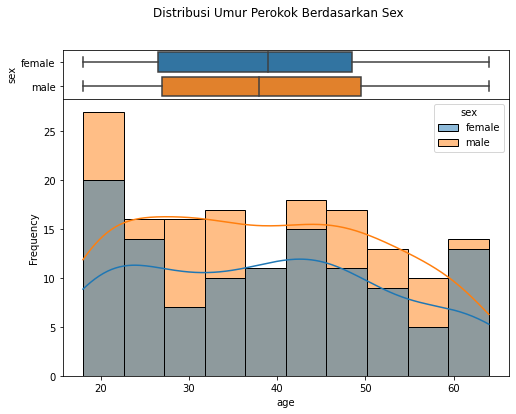

Mean umur perokok female: 38.61
Mean umur perokok male: 38.45


In [10]:
data = df_smokers
varNumerik = 'age'
varKategori = 'sex'

plot_distribusi_data(df_smokers, varNumerik=varNumerik, varKategori=varKategori, title="Distribusi Umur Perokok Berdasarkan Sex")

mean_umur_berdasarkan_sex = get_mean(data, varNumerik, varKategori)

for sex in mean_umur_berdasarkan_sex.index:
    print(f"Mean umur perokok {sex}: {mean_umur_berdasarkan_sex[sex]}")

### Rata-Rata Tagihan Berdasarkan Merokok atau Tidaknya

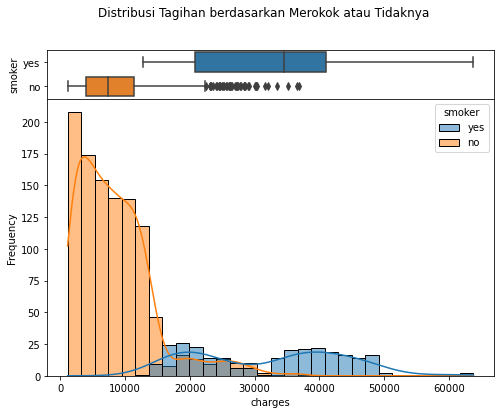

Mean tagihan perokok yes: 32050.23
Mean tagihan perokok no: 8434.27


In [11]:
data = df
varNumerik = 'charges'
varKategori = 'smoker'

plot_distribusi_data(data, varNumerik=varNumerik, varKategori=varKategori, title="Distribusi Tagihan berdasarkan Merokok atau Tidaknya")

mean_tagihan_berdasarkan_status_merokok = get_mean(data, varNumerik, varKategori)

for status in mean_tagihan_berdasarkan_status_merokok.index:
    print(f"Mean tagihan perokok {status}: {mean_tagihan_berdasarkan_status_merokok[status]}")

# Analisis Variabel Kategorik (PMF)

In [12]:
def PMF(data, title):
    
    events, count_events = np.unique(data, return_counts=True)
    proba_events = count_events / len(data)
    
    plt.bar(events, proba_events)
    plt.title(title)
    plt.xticks(events)
    plt.xlabel(data._name)
    plt.ylabel("Probability")
    
    plt.show()
    
    print(np.round(pd.Series(proba_events, index=events),3))

### Gender Mana yang Memiliki tagihan Paling Tinggi?

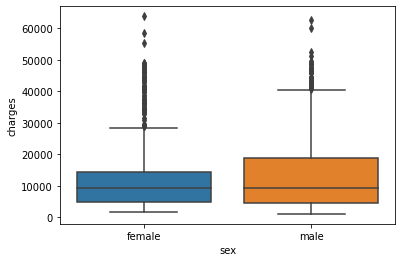

Mean tagihan asuransi bagi perempuan: 12569.57884383534
Mean tagihan asuransi bagi laki-laki: 13956.751177721886

Tagihan tertinggi dimiliki oleh pengguna berjenis kelamin female, yakni sebesar 63770.42801


In [13]:
sns.boxplot(data=df, x='sex', y='charges')
plt.show()
print(f"Mean tagihan asuransi bagi perempuan: {df[df['sex']=='female']['charges'].mean()}")
print(f"Mean tagihan asuransi bagi laki-laki: {df[df['sex']=='male']['charges'].mean()}")
print()
print(f"Tagihan tertinggi dimiliki oleh pengguna berjenis kelamin {df.loc[df['charges'].argmax(),'sex']}, yakni sebesar {df['charges'].max()}")

### Proporsi Pengguna tiap Region

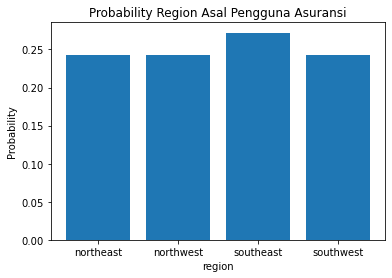

northeast    0.242
northwest    0.243
southeast    0.272
southwest    0.243
dtype: float64


In [14]:
proba_regions = PMF(df['region'], "Probability Region Asal Pengguna Asuransi")

Dapat dilihat bahwa peluang pengguna berasal dari region tertentu mengikuti distribusi uniform, dengan pengguna berasal dari northeast adalah 24,2%, dari northwest adalah 24,3%, dari southeast adalah 27,2%, dan dari southwest adalah 24,3%.

### Proporsi antara Perokok dan Non-Perokok

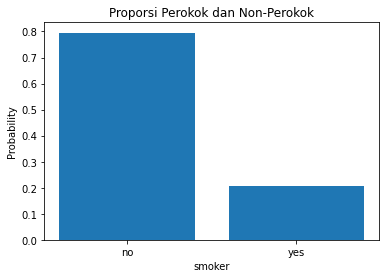

no     0.795
yes    0.205
dtype: float64


In [15]:
PMF(df['smoker'], "Proporsi Perokok dan Non-Perokok")

Dapat dilihat bahwa proporsi perokok adalah sebesar 20,5%, sedangkan proporsi nonperokok adalah 79,5%.

### Peluang Jenis Kelamin dari Seorang Perokok

In [17]:
sampel_perokok = df[df['smoker']=='yes']

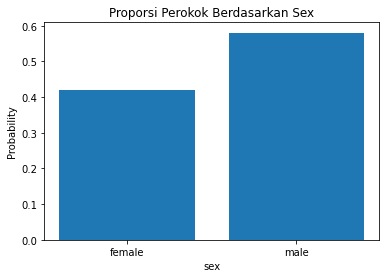

female    0.42
male      0.58
dtype: float64


In [18]:
PMF(sampel_perokok['sex'], "Proporsi Perokok Berdasarkan Sex")

Bila diketahui bahwa seseorang itu merokok, dapat diperkirakan bahwa peluang ia perempuan adalah sebesar 42%, sedangkan peluang ia adalah laki-laki adalah 58%.

### Distribusi Tagihan tiap Region

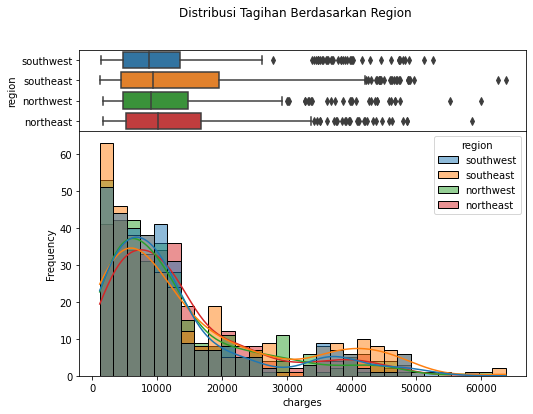

In [19]:
plot_distribusi_data(data=df, 
                     varNumerik='charges', 
                     varKategori='region', 
                     title='Distribusi Tagihan Berdasarkan Region', 
                     height_ratio=(.25, .75))

In [20]:
def centrality(data, ax):
    ax.axvline(data.mean(), color="k", linestyle="--", label = "mean")
    ax.axvline(np.median(data), color="r", linestyle="--", label = "median")
    ax.legend()

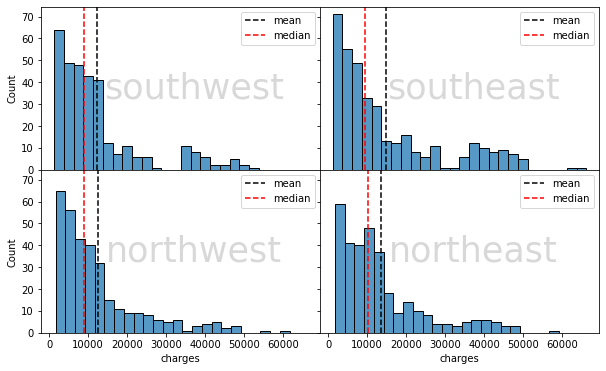

In [21]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 6))
fig.subplots_adjust(hspace=0, wspace=0)
ax = ax.flatten()

for i,region in enumerate(df['region'].unique()):
    data = df[df['region']==region]
    sns.histplot(data=data, x='charges', ax=ax[i], binwidth=2500)
    centrality(data['charges'], ax[i])
    ax[i].text(0.55, 0.5, region, transform= ax[i].transAxes, fontsize=35, color='gray', alpha=0.3, ha='center', va='center')
    
plt.show()

# Analisis Variabel Kontinu (CDF)

### Joint Plot BMI dan Tagihan

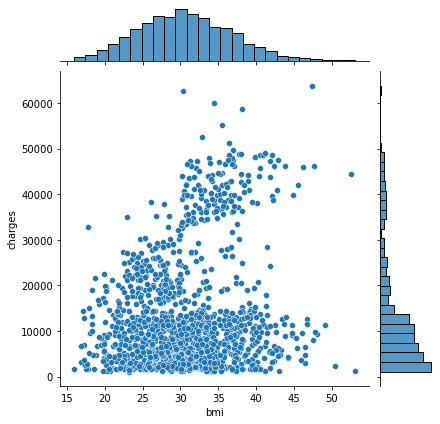

In [80]:
g = sns.jointplot(data=df, x='bmi', y='charges')
plt.show()

In [51]:
def joint_plot_3d(x,y):
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    print(xmin, xmax, ymin, ymax)
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    w = ax.plot_wireframe(xx, yy, f)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('PDF')
    ax.set_title('Joint PDF');

12.243 56.847 -5142.981511 70035.283421


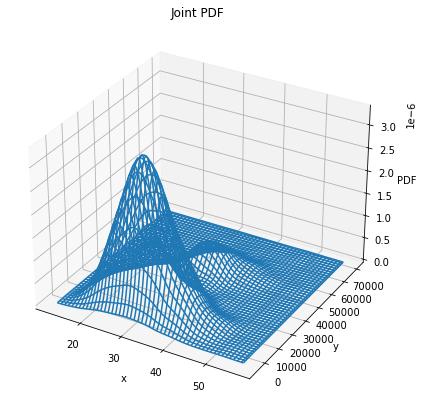

In [52]:
joint_plot_3d(x=df['bmi'], y=df['charges'])

Bila kita melihatnya berdasarkan status merokok, maka kita dapat membedakan kedua klaster

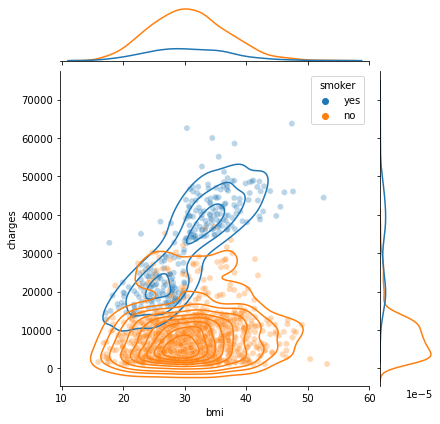

In [79]:
g = sns.jointplot(data=df, x='bmi', y='charges', hue='smoker', kind='kde') 
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.3, ax=g.ax_joint, hue='smoker')
plt.show()

### Peluang Tagihan di atas 16.700, Diketahui BMI di atas 25

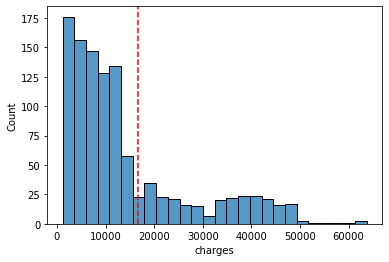

In [66]:
condition = df['bmi'] > 25
fig, ax = plt.subplots(1,1)
sns.histplot(data=df[condition], x='charges', ax=ax)
ax.axvline(16700, color="r", linestyle="--", label = "charges = 16.700")
# plt.legend()
plt.show()

Dapat dilihat bawa data tagihan untuk BMI > 25 memiliki distribusi eksponensial. Oleh karena itu, untuk membantu menghitung peluang tagihan dapat digunakan rumus PDF distribusi eksponensial, yakni
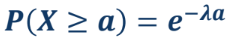
Biarlah X adalah variabel random tagihan asuransi dalam USD

Lambda didapat dari ekspektansi tagihan dengan rumusnya
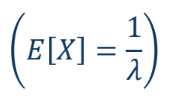

In [72]:
a = 16700
mean = df[condition]['charges'].mean()
lambd = 1/mean
prob_tagihan_diatas_16700_BMI25 = np.exp(-lambd*a)
print(f"Peluang mendapatkan tagihan di atas USD{a} (bila diketahui BMI di atas 25) adalah {prob_tagihan_diatas_16700_BMI25:.3f}")

Peluang mendapatkan tagihan di atas USD16700 (bila diketahui BMI di atas 25) adalah 0.302
